In [57]:
import pandas as pd
import csv


inputfile = csv.reader(open('2017dataset.csv','r'))
writer = csv.writer(open('output.csv', 'w'))
data_arr = []
for row in inputfile:
    if row[3] != "Week":
        row[3] = int(row[3].replace('Week ',''))
        data_arr.append(row)
    else:
        row[3] = row[3].replace('Week ','')
        data_arr.append(row)
        
with open('new2017data.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(data_arr)
data = pd.read_csv('new2017data.csv')


data



,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",1,3,Just right
1,36,Los Angeles,Apps,1,4,A little too fast
2,117,San Francisco,Games,1,4,Way too slow
3,253,NaN,NaN,2,4,A little too fast
4,350,New York City,"Apps, Explorer",1,4,Just right
5,23,Redwood City,Apps,1,5,Just right
6,28,Los Angeles,Apps,7,5,Just right
7,65,San Francisco,Apps,1,5,A little too slow
8,101,Santa Clara,Apps,1,5,A little too slow
9,124,Santa Clara,Apps,1,5,Just right


# How many more promoters are there than detractors across our 2017 data?

##### Across the 2017 data 52.41% of the students are promoters compared to the 8.34% detractors 

In [58]:
promoters = len(data[(data['Rating (Num)'] == '9')  | (data['Rating (Num)'] == '10')])
passives = len(data[(data['Rating (Num)'] == '7')  | (data['Rating (Num)'] == '8')])
detractors = len(data[(data['Rating (Num)'] == '0') | (data['Rating (Num)'] == '1') | (data['Rating (Num)'] == '2') | (data['Rating (Num)'] == '3') | (data['Rating (Num)'] == '4') | (data['Rating (Num)'] == '5') | (data['Rating (Num)'] == '6')])

promoters = int(promoters)
passives = int(passives) 
detractors = int(detractors) 

print('There are {} more promoters than detractors'.format((promoters-detractors)))
print('{}% of students who have a rating feedback are promoters'.format((promoters/(promoters + passives + detractors))*100))
print('{}% of students who have a rating feedback are passives'.format((passives/(promoters + passives + detractors))*100))
print('{}% of students who have a rating feedback are detractors'.format((detractors/(promoters + passives + detractors))*100))
      


There are 639 more promoters than detractors
52.41379310344828% of students who have a rating feedback are promoters
39.241379310344826% of students who have a rating feedback are passives
8.344827586206897% of students who have a rating feedback are detractors


# Which track boasts the best promoter-to-detractor ratio?

##### In the 2017 Data the VR tracks boasts the best promoter-to-detractor ratio


In [59]:
data.groupby(['Track'])['Rating (Num)'].value_counts()

Track            Rating (Num)
Apps             8               244
                 9               234
                 10              204
                 7               111
                 6                40
                 5                25
                 3                 5
                 4                 5
                 2                 2
                 0                 1
Apps, Explorer   8                73
                 10               51
                 9                40
                 7                36
                 6                 9
                 5                 7
                 3                 3
                 4                 3
                 1                 2
Games            9                76
                 10               57
                 8                54
                 7                12
                 6                 6
                 4                 2
                 5                 1
Games, E

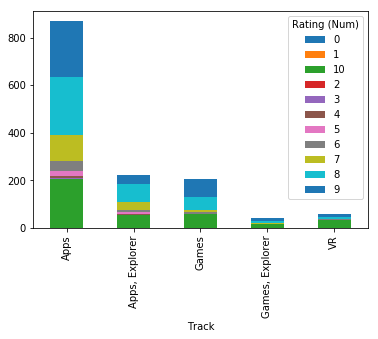

In [60]:
data.groupby(['Track'])['Rating (Num)'].value_counts().unstack().plot(kind='bar',stacked=True)

# Does the student experience get better the longer that they are enrolled at the Summer Academy?

##### The 2017 data shows that the experience gets better at a consistent rate.


In [61]:
import seaborn as sns

week1p =  98 + 61
week1d = 2+6+9+12
week1all = 8+91+10+68+61+40+12+9+6+1

week8p =  4 + 3
week8pas = 1 + 1
week8all = week8p + week8pas



print('Week 1 had {}% promoters vs {}% detractors'.format(((week1p/ week1all)* 100),((week1d/ week1all)* 100)))
print('Week 8 had {}% promoters vs {}% passive and 0% detractors'.format(((week8p/ week8all)* 100),((week8pas/ week8all)* 100)))
data.groupby(['Week'])['Rating (Num)'].value_counts()

Week 1 had 51.9607843137255% promoters vs 9.477124183006536% detractors
Week 8 had 77.77777777777779% promoters vs 22.22222222222222% passive and 0% detractors


Week  Rating (Num)
1     8               91
      10              68
      9               61
      7               40
      6               12
      5                9
      4                6
      3                1
2     8               82
      9               76
      10              61
      7               34
      6               12
      5                6
      3                2
      4                2
      #ERROR!          1
      0                1
3     9               69
      10              66
      8               64
      7               22
      6               13
      5                5
      #ERROR!          2
      1                1
      3                1
4     9               55
      8               49
      10              45
                      ..
      3                2
5     10              52
      8               45
      9               45
      7               22
      6                7
      5                4
      4                2
      

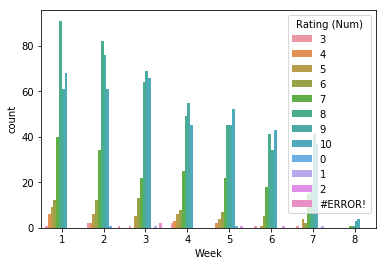

In [62]:
sns.countplot(x="Week",hue="Rating (Num)", data=data)

# What are things we could find here that could “help the business”?

##### From the data given we could find what track has the most detractors on average and spend resources improving that class thus improving experience or remove it all together and spend the extra resources on the other better received tracks.

##### Another thing we could find is where most of the students are from so we can either push more ads there or retract some and place them where we could use more admissions from.

# What sorts of information does this dataset contain?
 
 ##### This dataset contains information that can be used to improve the buisness depeding  on what questions and how many questions are ask there are vareing levels of success


# What kinds of questions might we be able to answer with this data?
##### With this data we can answer questions about student satisfaction what courses need more attention or even just what would make an over all better experience


# What kinds of questions can’t we answer with this data?
##### Questions likes Does Student Satisfaction correlate with students performance, or does student living situatation contriubute to their experience?. 

# What sorts of information might be actionable?
##### Information about Tracks, student satisfaction, and promoters vs detractors can all be actionable.


# How can you present your findings in a way that non-technical employees can understand and use to make decisions?

##### To present data to non-technical employees you dont have to go indepths on how you got the answer just have diagrams and final numbers also make sure that if presenting calculations that they wont take long for someone to resolve.

